In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# All 29 Instagram Accounts
 - Because I had no look looking specifically at search healthy recipe trends and COVID-19 data, I am interested in seeing what I can draw from popular health food Instagram accounts. This notebook will identify 29 Instagram accounts and run analyses on likes, comments, and number of posts. I chose which accounts to analyze by looking at Upfluencer, a website that uses software to see which accounts are growing in likes and engagement: https://www.upfluence.com/influencer-marketing/15-healthy-food-instagram-accounts-to-follow-in-2020

In [3]:
insta_df = pd.read_csv('../data/Instagram_accounts.csv')

In [4]:
insta_df.shape

(59259, 6)

This Dataframe shows 29 Instagram accounts that have been scraped for every post. The dataset has every post URL, the comment for each post, the comment count, like count, date published and username of the account which posted. 

* Using the PhantomBuster website (https://phantombuster.com/) and the __Instagram Posts Extractor__ pointed at 29 different accounts I was able to download a CSV file that contains details of all of the posts on accounts.

* The CSV file is uploaded to `data/instagram/Instagram_Users.csv`

* Main columns are:
    * `postUrl` - URL for the post on Instagram
    * `description` - text posted - description of the recipe etc
    * `commentCount` - number of comments
    * `likeCount` - number of likes
    * `pubDate` - date when posted

In [5]:
insta_df['likeCount'] = pd.to_numeric(insta_df['likeCount'],errors = 'coerce')

In [6]:
insta_df.head()

,postUrl,description,commentCount,likeCount,pubDate,username
0,https://www.instagram.com/p/CHoH0JqHUlE/,"🌱Here are our green foods for the week ahead, ...",0.0,35.0,2020-11-15T21:43:08.000Z,agathaachindu
1,https://www.instagram.com/p/CHnSMwxng2v/,🍒Happy meal prep Sunday. \n\n🌱 As you meal pre...,14.0,193.0,2020-11-15T13:54:38.000Z,agathaachindu
2,https://www.instagram.com/p/CHjW46HHnXS/,🌱Okra! one of my all time favorite foods growi...,23.0,132.0,2020-11-14T01:18:39.000Z,agathaachindu
3,https://www.instagram.com/p/CHgrIjWn1ag/,🌱Add a few nutrient dense ingredients to your ...,14.0,253.0,2020-11-13T00:17:50.000Z,agathaachindu
4,https://www.instagram.com/p/CHgrEsRH8D3/,🌱Add a few nutrient dense ingredients to your ...,14.0,253.0,2020-11-13T00:17:50.000Z,agathaachindu


In [7]:
insta_df['pubDate'].iloc[[0,-1]]

0        2020-11-15T21:43:08.000Z
59258    2016-04-03T00:11:26.000Z
Name: pubDate, dtype: object

In [12]:
acct_df = insta_df.groupby('username')

In [13]:
acct_df.first()

,postUrl,description,commentCount,likeCount,pubDate
username,,,,,
agathaachindu,https://www.instagram.com/p/CHoH0JqHUlE/,"🌱Here are our green foods for the week ahead, ...",0.0,35.0,2020-11-15T21:43:08.000Z
agipsyinthekitchen,https://www.instagram.com/p/CHmoCaoHymZ/,"Inverno.\nLa tazza di tè fumante, le cose ritr...",47.0,1997.0,2020-11-15T07:46:13.000Z
chocolatecoveredkatie,https://www.instagram.com/p/CHny3JgsSzf/,"💗4 Ingredient Chocolate Brownie Bombs! Vegan, ...",52.0,5986.0,2020-11-15T18:40:03.000Z
choosingchia,https://www.instagram.com/p/CHqZdaMhIpp/,New on the blog: Pumpkin Spice Granola! ⁠⠀\n⁠⠀...,28.0,779.0,2020-11-16T18:55:48.000Z
cleanfooddirtycity,https://www.instagram.com/p/CFu2fuMhsj0/,One-pot cauliflower bolognese lasagna! Link in...,42.0,555.0,2020-09-29T19:23:42.000Z
georginaburgess_,https://www.instagram.com/p/CHdoWNCgJt6/,finding being in the kitchen creating so thera...,29.0,949.0,2020-11-11T19:55:46.000Z
healthyliciousvegan,https://www.instagram.com/p/CHiZJWQKeMj/,✨Buddha Bowls with a black tahini dressing 🖤✨ ...,57.0,390.0,2020-11-13T16:19:08.000Z
joybauer,https://www.instagram.com/p/CHnZxPTJp16/,This Kitchen Sink Omelet in a Mug is as easy a...,23.0,1269.0,2020-11-15T15:00:47.000Z
lizmoody,https://www.instagram.com/p/CHp_sRVHpjv/,ONE OF THE BEST PRODUCTIVITY TIPS I'VE HEARD 💡...,44.0,1585.0,2020-11-16T15:10:39.000Z


Sorting the table this way allows us to see all 29 Instagram accounts and the data on their most recent post. 

# Aggregate Number of Posts Over Time 

In [27]:
insta_df = insta_df.set_index(pd.to_datetime(insta_df['pubDate'],errors='coerce'))

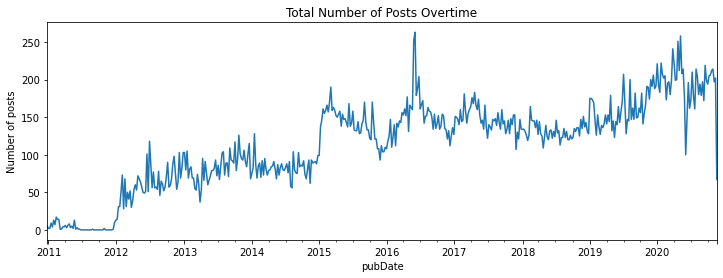

In [28]:
insta_df.resample('W').size().plot(figsize=(12,4))
plt.ylabel('Number of posts')
plt.title('Total Number of Posts Overtime');

This shows the number of posts in total since 2011. It is very likely that many of the accounts did not start in 2011 which is why the number of posts slowly increases over time. There is no clear trend in this graph; however, it shows that posts on social media are always variable. The decline in 2020 is likely during the Black Lives Matter Movement that occurred in June 2020 which shows the power of using social media as a platform for change 

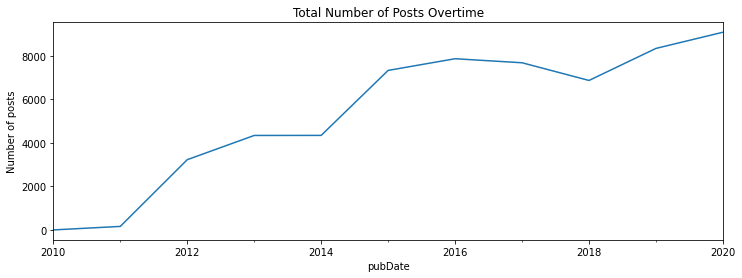

In [29]:
insta_df.resample('Y').size().plot(figsize=(12,4))
plt.ylabel('Number of posts')
plt.title('Total Number of Posts Overtime');

This graph consolidates the time frame into a yearly basis which provides a more clear visual representation of this trend over time. According to this graph, the number of posts has generally been increasing every year. Now I want to look more narrowly at this past year to understand the current environment of health accounts on social media. 

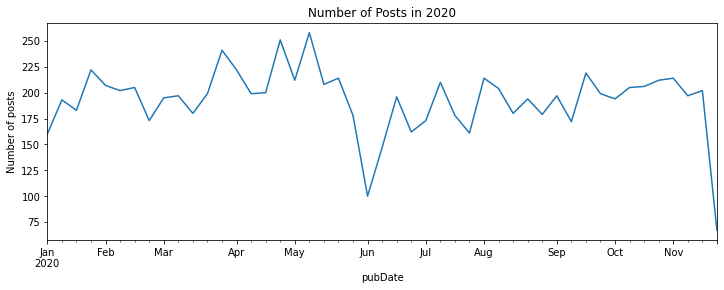

In [30]:
insta_df.loc['2020'].resample('W').size().plot(figsize=(12,4))
plt.ylabel('Number of posts')
plt.title('Number of Posts in 2020');

This shows the number of posts per month for all accounts in 2020. We can see a few peaks in April and May which were the height of quarantine. Again, the dip in June corresponds with the "Black Lives Matter" movement on social media. 

# Aggregate Number of Likes and Comments Over Time
 - Likes and comments show how much Followers engage with each post. Therefore, it is even more useful data than simply looking at the number of total posts over time. 

Text(0.5, 1.0, 'Average Number of Likes Per Post in 2020')

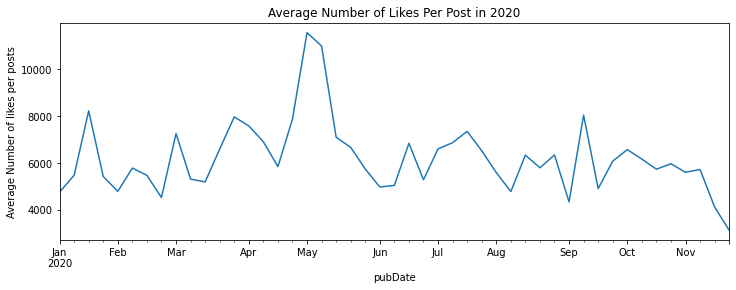

In [31]:
insta_df.loc['2020'].resample('W')['likeCount'].mean().plot(figsize=(12,4))
plt.ylabel('Average Number of likes per posts')
plt.title('Average Number of Likes Per Post in 2020')

This shows average likes across all accounts in 2020. Here we can see a large peak in May where the average number of likes per post was over 10,000. We can also see that the number of likes a user receives fluctuates. Many time influencers feel pressured to get a certain number of likes; however, this shows that variety is normal. In fact, to see that fluctuation is normal– we can extend the data past 2020 to see that like counts have been like over the years. 

In [32]:
year_filter = insta_df.index.year>2017

In [33]:
insta_df_since2018 = insta_df[year_filter]

Text(0.5, 1.0, 'Average Number of Likes Per Post over Time')

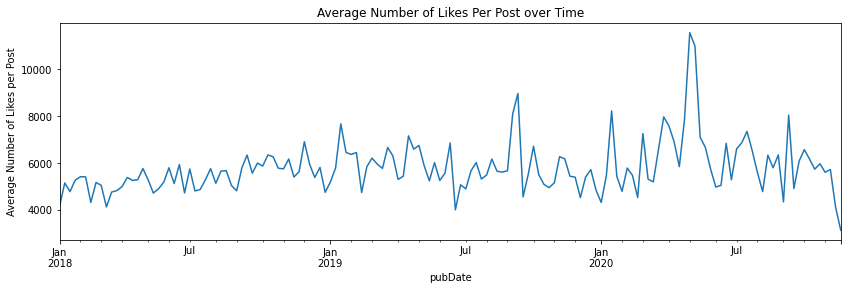

In [34]:
insta_df_since2018.resample('W')['likeCount'].mean().plot(figsize=(14,4))
plt.ylabel('Average Number of Likes per Post')
plt.title('Average Number of Likes Per Post over Time')

This shows average likes across all accounts starting in 2018. As we saw in the "Average Number of Likes per Post in 2020" graph, it is very normal for the average number of likes to vary. However, what we do see is that the average number of likes has seemed to increase as a whole in the past year. The may have been a result of quarantine or a general increase in healthy baking recipes

Text(0.5, 1.0, 'Average Number of Comments Per Post in 2020')

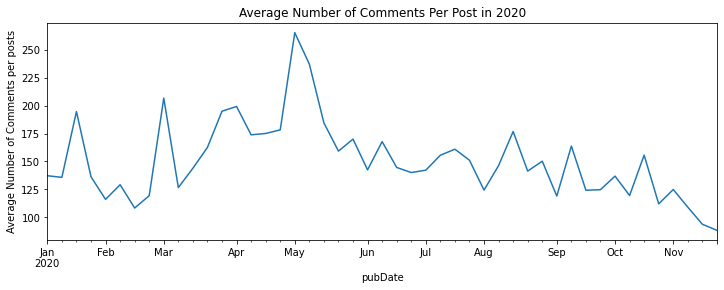

In [35]:
insta_df.loc['2020'].resample('W')['commentCount'].mean().plot(figsize=(12,4))
plt.ylabel('Average Number of Comments per posts')
plt.title('Average Number of Comments Per Post in 2020')

This shows the average total comments across all accounts in 2020. The graph is very similar to that of the comment data. Here we can see one large peak in May which may correspond with quarantine as everyone was stuck at home and itching for something to do. However, it could also be entirely unrelated as we know that social media is likes and comments is incredibly variable in any given year.

Text(0.5, 1.0, 'Average Number of Comments Per Post over Time')

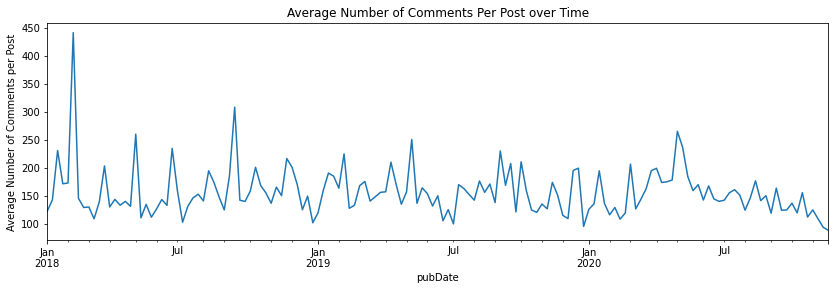

In [36]:
insta_df_since2018.resample('W')['commentCount'].mean().plot(figsize=(14,4))
plt.ylabel('Average Number of Comments per Post')
plt.title('Average Number of Comments Per Post over Time')

This shows average comments across all accounts starting in 2018. As we saw in the "Average Number of Comments per Post in 2020" graph, it is very normal for the average number of comments to vary. However, what we do see is that the average number of likes has seemed to increase as a whole in the past year. The may have been a result of quarantine or a general increase in healthy baking recipes

# Analyzing Accounts by Category

* This section categorizes all the accounts into four distinct categories: vegan, plant-based, paleo, and "other". Other means that the account does not specify a dietary preference or restriction. I am going to look specifically at number of Followers to see if certain dietary constraints garner more Followers than others. 

In [37]:
insta_df2 = pd.read_csv('../data/Instagram_excel.csv')

In [38]:
insta_df2.shape

(29, 4)

In [39]:
insta_df2['Followers_base'] = np.where(insta_df2['Followers'].str[-1] == 'k',1000,1000000)
insta_df2['Followers_num'] = insta_df2['Followers'].map(lambda x: x.lstrip('+-').rstrip('kM')).astype(float)*insta_df2['Followers_base']
insta_df2

,Account,Followers,Notes,Other,Followers_base,Followers_num
0,agathachidu,14k,Other,Health coach,1000,14000.0
1,maddielymburner,278k,Plant based,Blogger,1000,278000.0
2,healthyliciousvegan,12k,Vegan,Blogger,1000,12000.0
3,pickuplimes,614k,Plant based,Dietician,1000,614000.0
4,sweetpotatosoul,178k,Vegan,Blogger,1000,178000.0
5,the_buddhist_chef,305k,Vegan,author,1000,305000.0
6,purelykaylie,191k,Plant based,Blogger,1000,191000.0
7,pascalbaudar,70k,Other,Food artist and author,1000,70000.0
8,plantifullybased,224k,Plant based,Blogger,1000,224000.0
9,georginaburgess,59k,Vegan,Blogger,1000,59000.0


This table has added qualitative columns to the original insta_df columns: 
 - `Notes`: categorizes each account by the dietary restriction 
 - `Other`: lists the profession of each person running the account 
 - `Follower_num`: strips the letter at the end of the Followers 
 
Now we can look at the statistics for each account based on the type of dietary restriction: paleo, plant based, and vegan, and unspecified 

# Vegan Instagram Accounts: 

In [40]:
vegan_df = insta_df2.loc[insta_df2["Notes"] == "Vegan"]

In [41]:
vegan_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
2,healthyliciousvegan,12k,Vegan,Blogger,1000,12000.0
4,sweetpotatosoul,178k,Vegan,Blogger,1000,178000.0
5,the_buddhist_chef,305k,Vegan,author,1000,305000.0
9,georginaburgess,59k,Vegan,Blogger,1000,59000.0
11,thecuriouschickpea,68k,Vegan,Blogger,1000,68000.0
14,chocolatecoveredkatie,467k,Vegan,Blogger,1000,467000.0


In [42]:
vegan_df['Followers_num'].mean()

181500.0

There are six plant-based accounts. Across all six accounts that prescribe to veganism, they have an average of 181,500 Followers.

 # "Unspecified" Instagram accounts:
  - Other means that the account does not specify a dietary preference or restriction.

In [43]:
other_df = insta_df2.loc[insta_df2["Notes"] == "Other"]

In [44]:
other_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
0,agathachidu,14k,Other,Health coach,1000,14000.0
7,pascalbaudar,70k,Other,Food artist and author,1000,70000.0
10,agipsyinthekitchen,118k,Other,Blogger,1000,118000.0
12,munchin.withmar,14k,Other,Blogger,1000,14000.0
13,chefpetergordon,24k,Other,Chef,1000,24000.0
15,minimalistbaker,2M,Other,Blogger,1000000,2000000.0
16,shutthekaleup,352k,Other,Blogger,1000,352000.0
17,choosingchia,312k,Other,Blogger,1000,312000.0
18,lizmoody,136k,Other,Journalist,1000,136000.0
19,cleanfooddirtycity,109k,Other,Blogger,1000,109000.0


In [45]:
other_df['Followers_num'].mean()

297618.75

There are sixteen accounts that do not specify their dietary restraints. Across all sixteen accounts with no specified dietary restriction, there are an average of 297,618 Followers.

# Paleo Instagram accounts:

In [46]:
paleo_df = insta_df2.loc[insta_df2["Notes"] == "Paleo"]
paleo_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
22,nomnompaleo,482k,Paleo,Author,1000,482000.0


In [47]:
paleo_df['Followers_num'].mean()

482000.0

You'll notice this category only as one account. As a result, it is difficult to consider this a sample of the larger category. 

# Plant-based Instagram Accounts:

In [48]:
plantbased_df = insta_df2.loc[insta_df2["Notes"] == "Plant based"]
plantbased_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
1,maddielymburner,278k,Plant based,Blogger,1000,278000.0
3,pickuplimes,614k,Plant based,Dietician,1000,614000.0
6,purelykaylie,191k,Plant based,Blogger,1000,191000.0
8,plantifullybased,224k,Plant based,Blogger,1000,224000.0
20,lonijane,382k,Plant based,Author,1000,382000.0
25,mynewroots,384k,Plant based,Nutritionist,1000,384000.0


In [49]:
plantbased_df['Followers_num'].mean()

345500.0

There are six plant-based accounts. Across all six, they have an average of 345,500 Followers.

# Merging two datasets– a comprehensive view: 
 - Now I am going to combine the insta_df which shows all posts for 29 accounts and insta_df2 which categorizes all 29 accounts by their dietary type. This will allow us to look at more than just follower data. Now we can see likes, comments, post URLs, pubDate, number of Followers, dietary preference and profession all in one spot. Unfortunately these comparisons are not telling as there are an inconsistent number of accounts per group and there is only one paleo user. 

In [50]:
combined_df = pd.merge(insta_df, insta_df2, left_on='username', right_on='Account ')
combined_df = combined_df.drop(columns = 'Account ')
combined_df

,postUrl,description,commentCount,likeCount,pubDate,username,Followers,Notes,Other,Followers_base,Followers_num
0,https://www.instagram.com/p/CGDGulUhetO/,just really happy &amp; grateful for life righ...,420.0,33088.0,2020-10-07T16:10:21.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
1,https://www.instagram.com/p/CGDGulThoKV/,just really happy &amp; grateful for life righ...,420.0,33088.0,2020-10-07T16:10:21.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
2,https://www.instagram.com/p/CFsMm1vBfA4/,Had the best week away in one of my favourite ...,138.0,32231.0,2020-09-28T18:39:12.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
3,https://www.instagram.com/p/CFsMm1tBvVA/,Had the best week away in one of my favourite ...,138.0,32231.0,2020-09-28T18:39:12.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
4,https://www.instagram.com/p/CFsMm1uBxx7/,Had the best week away in one of my favourite ...,138.0,32231.0,2020-09-28T18:39:12.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
...,...,...,...,...,...,...,...,...,...,...,...
54578,https://www.instagram.com/p/BD1Rv3bMZrW/,Feels like summer ☀️ #fruitlovers #hippielane,357.0,23297.0,2016-04-05T20:45:15.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0
54579,https://www.instagram.com/p/BDypBjEMZvs/,Rainbow Sushi for breakfast 🍙☄✨ #sushilovers #...,239.0,14460.0,2016-04-04T20:10:56.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0
54580,https://www.instagram.com/p/BDx5GYusZmw/,Does breakfast count? 🤔🙃☺️ #goals #hippielane,165.0,6563.0,2016-04-04T13:12:09.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0
54581,https://www.instagram.com/p/BDwNpSpMZoq/,Strawberries &amp; Cream dreams 💞💫✨ #hippielane,552.0,32979.0,2016-04-03T21:33:12.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0


In [51]:
combined_df.groupby('Notes')['Followers_num'].mean()

Notes
Other          444435.141906
Paleo          482000.000000
Plant based    330200.613900
Vegan          188405.729772
Name: Followers_num, dtype: float64

According to this data, paleo accounts have the most followers; however, I think this is an inaccurate statement to make as only 1 of the 29 accounts identified as paleo. We would need more data to say anything definitive about this.

In [52]:
combined_df.groupby('Notes')['likeCount'].mean()

Notes
Other          3824.781520
Paleo          1944.851723
Plant based    5830.157312
Vegan          2566.188540
Name: likeCount, dtype: float64

According to this data, plant-based accounts get the most likes and paleo accounts get the least amount of likes per post.

In [53]:
combined_df.groupby('Notes')['commentCount'].mean()

Notes
Other          104.014376
Paleo           73.654859
Plant based    110.320873
Vegan           68.050329
Name: commentCount, dtype: float64

According to this data, plant-based accounts get the most comments per post and vegan accounts get the least amount of comments per post. 

In [54]:
combined_df = combined_df.set_index(pd.to_datetime(combined_df['pubDate'],errors='coerce'))

Text(0.5, 1.0, 'Number of Posts per Type of Healthy Food Category in 2020')

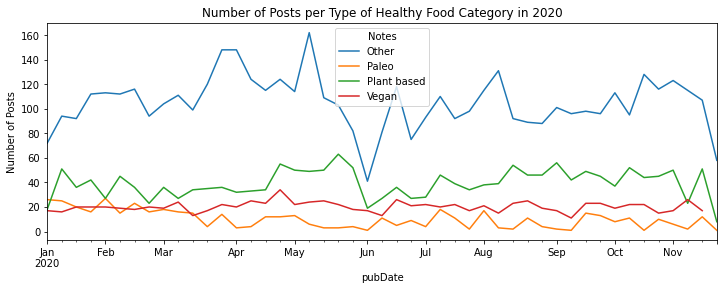

In [55]:
combined_df.loc['2020'].groupby('Notes').resample('W').size().unstack(0).plot(figsize=(12,4))
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Type of Healthy Food Category in 2020')

This graph shows number of posts per week for each category in 2020. This models similar trends as what we have seen with for the aggregated average number of posts in 2020. The same trends apply: the number of posts varies and the dip in June corresponds with an allegiance to the "Black Lives Matter" Movement.

What makes this graph unique is that it is separated by "other" (blue), "paleo" (orange), "plant based" (green) and "vegan" (red). The "other" trend line is significantly higher than the rest which is likely because there are the most accounts in this category. Interestingly, the four lines follow similar dips and peaks. For example, May spikes, June declines, August peaks, and mid-October spikes. However, there is no conclusive reason or explanation for this association. 

Text(0.5, 1.0, 'Average Number of Likes per Type of Healthy Food Category in 2020')

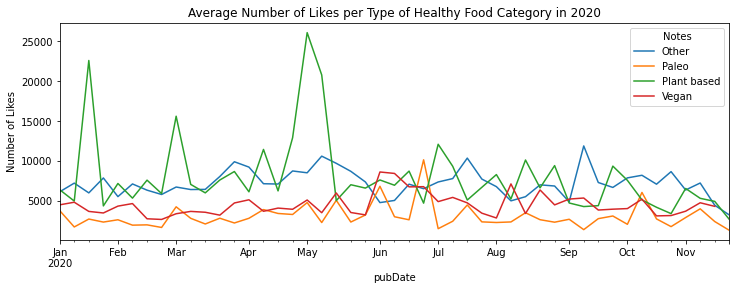

In [57]:
combined_df.loc['2020'].groupby('Notes').resample('W')['likeCount'].mean().unstack(0).plot(figsize=(12,4))
plt.ylabel('Number of Likes')
plt.title('Average Number of Likes per Type of Healthy Food Category in 2020')

This graph shows the average number of likes per post on a weekly basis for each category in 2020. Like the graph above each category has its own line: "other" (blue), "paleo" (orange), "plant based" (green) and "vegan" (red). There is not a concrete trends in this graph either– it fluctuates as most like graphs do. However, it is notable that plant-based accounts seem to have certain abnormal peaks in January, March and May. As previously noted, plant based accounts have the most average likes which explains these increases.

Text(0.5, 1.0, 'Average Number of Comments per Type of Healthy Food Category in 2020')

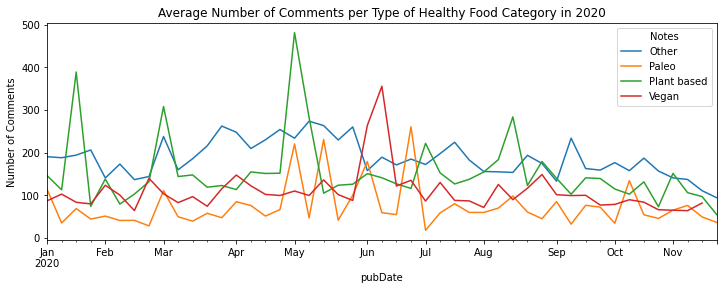

In [58]:
combined_df.loc['2020'].groupby('Notes').resample('W')['commentCount'].mean().unstack(0).plot(figsize=(12,4))
plt.ylabel('Number of Comments')
plt.title('Average Number of Comments per Type of Healthy Food Category in 2020')

Like the graph above each category has its own line: "other" (blue), "paleo" (orange), "plant based" (green) and "vegan" (red). This graph shows average comments over time for each type of account throughout 2020. For the sake of repetition– all this graphs fluctuates very open. Similar to what we see in the like count graph, plant-based accounts have the most average comments. Again, this means there is no right time post for comments. We see these spikes at certain months such as January, March, and May and August. 